In [80]:
import pandas as pd

csv_file_path = "housing.csv"

df = pd.read_csv(csv_file_path)
print(df.head())  

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3908592752.py:26: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


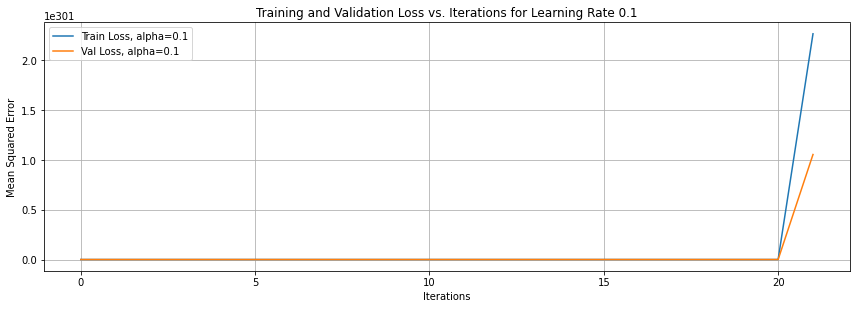

In [83]:
#PROBELM 1a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

# bias term (intercept) to X
X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and validation sets 
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []

    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        gradient = (1/m) * np.dot(X.T, y_pred - y)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  # Initialize parameters (thetas) to zero

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3908592752.py:26: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


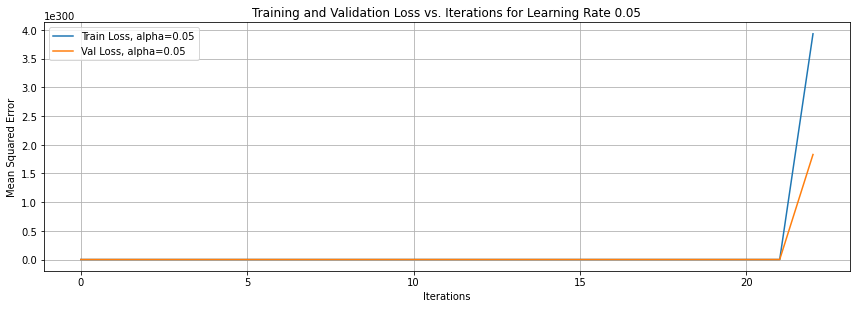

In [84]:
# Hyperparameters
learning_rate = 0.05  # Learning rate of 0.05
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  # Initialize parameters (thetas) to zero

# Perform gradient descent for the specific learning rate
theta_copy = initial_theta.copy()

# Plot training and validation loss and accuracy for the specified learning rate
theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

# Plot training and validation loss
plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3908592752.py:26: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


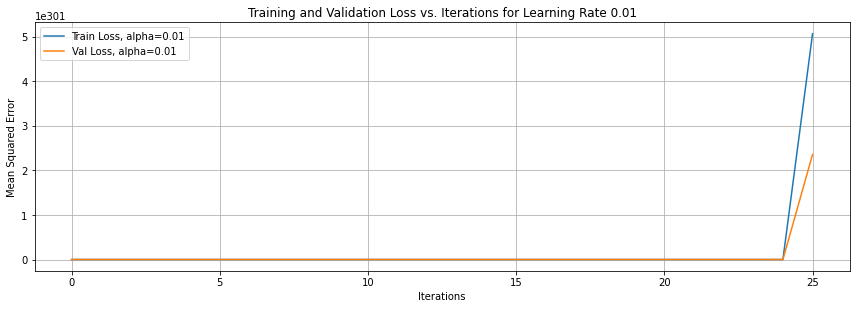

In [85]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.05
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  # Initialize parameters (thetas) to zero

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


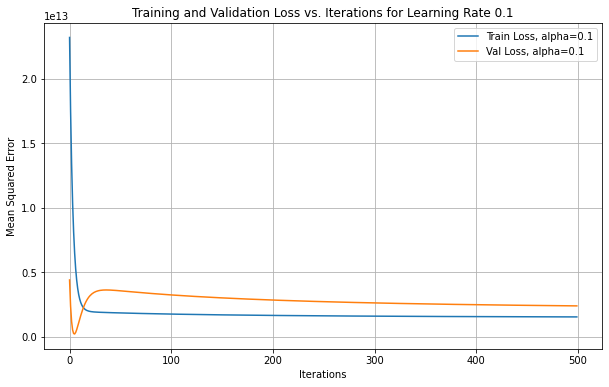

In [86]:
#PROBELM 2a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

# Min-Max Normalization
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X = (X - min_vals) / (max_vals - min_vals)

X = np.c_[np.ones(X.shape[0]), X]

# Split the dataset into training and validation sets
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        gradient = (1/m) * np.dot(X.T, y_pred - y)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


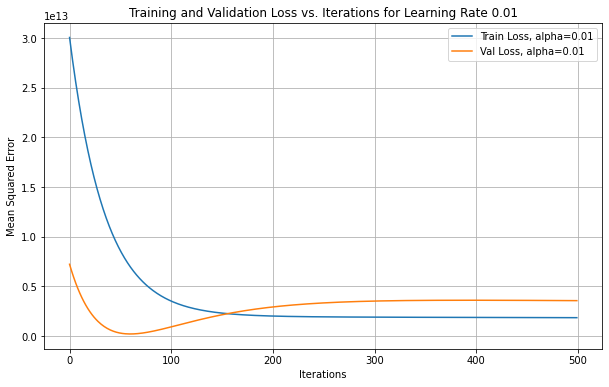

In [87]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()

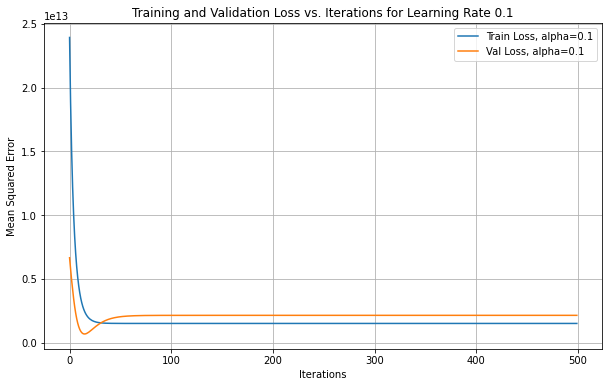

In [88]:
#STANDARDIZATION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

mean = X.mean(axis=0)
std = X.std(axis=0)

#STANDARDIZATION
X_std = (X - mean) / std

X_std = np.c_[np.ones(X_std.shape[0]), X_std]

split_ratio = 0.8
split_index = int(X_std.shape[0] * split_ratio)

X_train, y_train = X_std[:split_index], y[:split_index]
X_val, y_val = X_std[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)

        gradient = (1/m) * np.dot(X.T, y_pred - y)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X_std.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


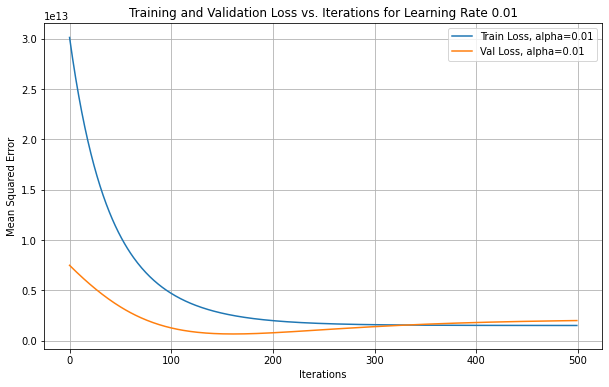

In [89]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X_std.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


In [90]:
theta_optimal

array([4982996.00414715,  632264.43342515,  111268.55549605,
        516115.9035407 ,  437660.04106128,  289520.92767106])

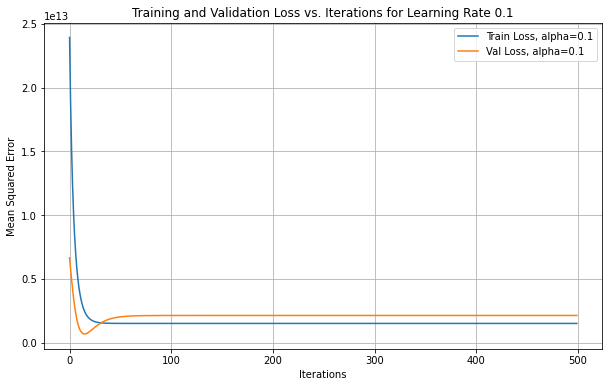

In [91]:
#PROBELM 3a 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

X = np.c_[np.ones(X.shape[0]), X]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent with L2 Regularization
def gradient_descent(X, y, theta, alpha, num_iterations, lambda_reg):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        # Calculate gradients with L2 regularization
        gradient = (1/m) * (np.dot(X.T, y_pred - y) + lambda_reg * theta)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  
lambda_reg = 0.3  # Regularization parameter 

# Perform gradient descent with L2 regularization
theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations, lambda_reg)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


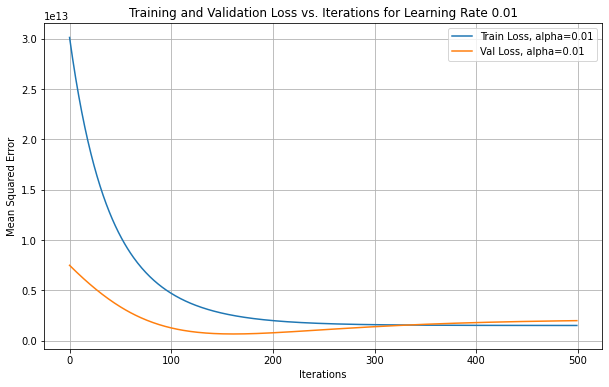

In [74]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  
lambda_reg = 0.3  # Regularization parameter (adjust as needed)

# Perform gradient descent with L2 regularization
theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations, lambda_reg)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()

In [92]:
#PROBLEM 1b

import pandas as pd

csv_file_path = "housing.csv"

df = pd.read_csv(csv_file_path)
print(df.head()) 
    
# Replace 'yes' with 1 and 'no' with 0 in the specifiC columns
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_convert:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

# Now, the specifiC columns contain binary values (1 for 'yes', 0 for 'no')

# Replace 'furnished' with 1, 'semi-furnished' with 2, and 'unfurnished' with 3 in the 'furnishingstatus' column
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [93]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3492437492.py:27: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


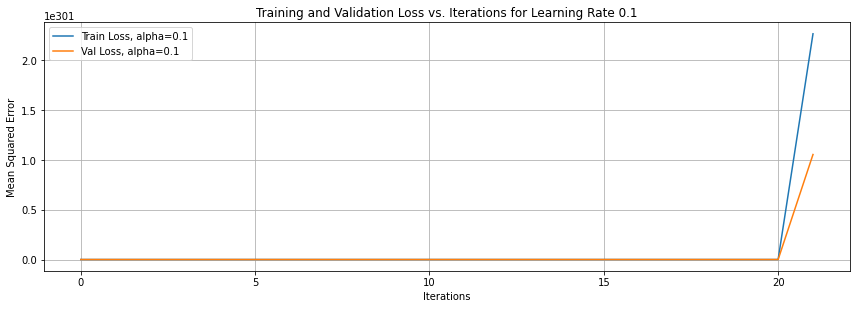

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X_numeric = data[numeric_features].values
y = data[target].values

# Extract the categorical features and perform one-hot encoding
X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).values

# Combine numeric and one-hot encoded categorical features
X = np.c_[np.ones(X_numeric.shape[0]), X_numeric, X_categorical]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []

    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        gradient = (1/m) * np.dot(X.T, y_pred - y)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1]) 

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3492437492.py:27: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


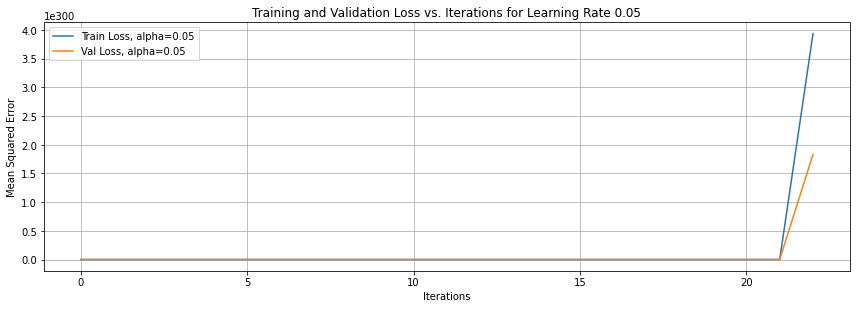

In [95]:
# Hyperparameters
learning_rate = 0.05  # Learning rate of 0.05
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


C:\Users\91966\AppData\Local\Temp\ipykernel_29248\3492437492.py:27: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)


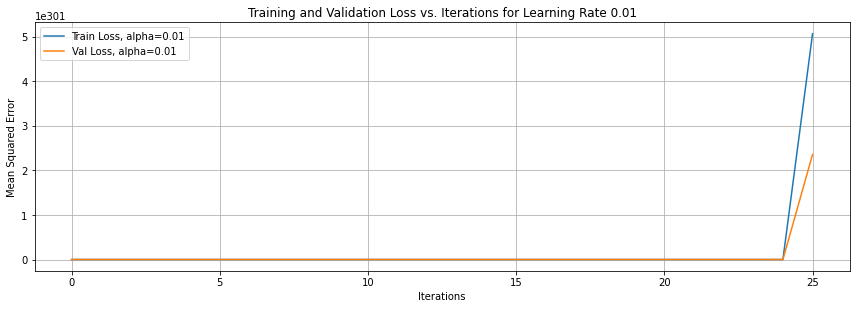

In [96]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X.shape[1]) 

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


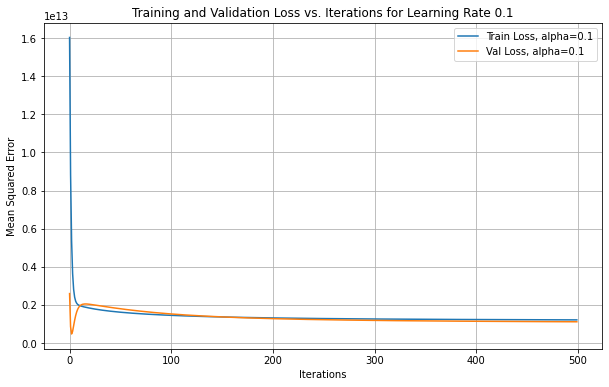

In [97]:
#PROBLEM 2b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X_numeric = data[numeric_features].values
y = data[target].values

X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).values

X = np.c_[X_numeric, X_categorical]

# Min-Max Normalization
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X = (X - min_vals) / (max_vals - min_vals)

X = np.c_[np.ones(X.shape[0]), X]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)

        gradient = (1/m) * np.dot(X.T, y_pred - y)

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


In [98]:
theta_optimal

array([2021215.49490909, 2308994.45042518, 1129925.24204555,
       2324636.66106874, 1361796.03903321, 1008123.19090538,
        675501.16623424,  303698.40143621,  314716.64902268,
        835243.02658603,  811633.91034479,  577483.98590855,
        -67330.19242359, -211550.44552135])

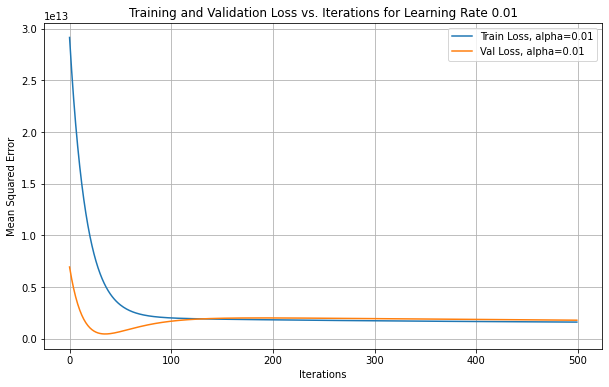

In [99]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()

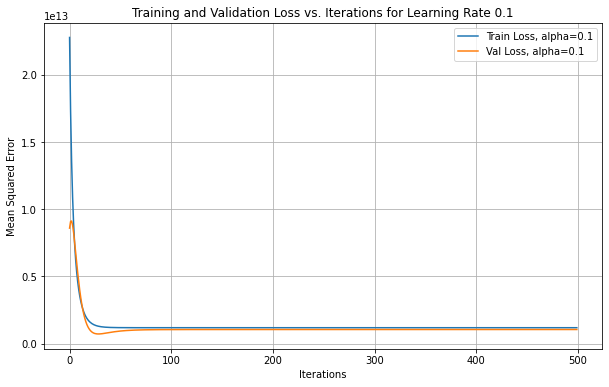

In [100]:
#Standardization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X_numeric = data[numeric_features].values
y = data[target].values

X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).values

X = np.c_[X_numeric, X_categorical]

mean = X.mean(axis=0)
std = X.std(axis=0)

# Standardize the input features
X_std = (X - mean) / std

X_std = np.c_[np.ones(X_std.shape[0]), X_std]

split_ratio = 0.8
split_index = int(X_std.shape[0] * split_ratio)

X_train, y_train = X_std[:split_index], y[:split_index]
X_val, y_val = X_std[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        gradient = (1/m) * np.dot(X.T, y_pred - y)
        
        theta -= alpha * gradient
        
        train_loss = mean_squared_error(y_train, np.dot(X_train, theta))
        history_train_loss.append(train_loss)
        
        val_loss = mean_squared_error(y_val, np.dot(X_val, theta))
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X_std.shape[1])

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


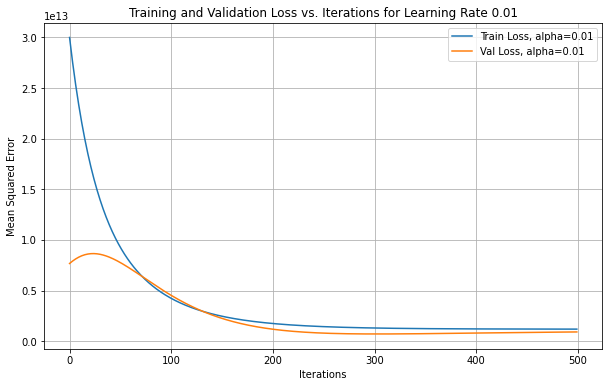

In [70]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X_std.shape[1])  # Initialize parameters (thetas) to zero

# Perform gradient descent for the specific learning rate
theta_copy = initial_theta.copy()

# Plot training and validation loss for the specified learning rate
theta_optimal, train_loss, val_loss = gradient_descent(X_train, y_train, theta_copy, learning_rate, num_iterations)

# Plot training and validation loss in a single graph
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss vs. Iterations for Learning Rate {learning_rate}')
plt.legend()
plt.grid()
plt.show()


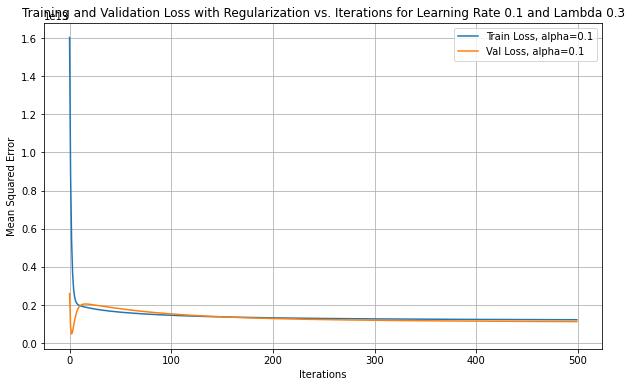

In [101]:
#PROBLEM 3b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X_numeric = data[numeric_features].values
y = data[target].values

X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).values

X = np.c_[X_numeric, X_categorical]

min_vals = X.min(axis=0)
max_vals = X.max(axis=0)
X = (X - min_vals) / (max_vals - min_vals)

X = np.c_[np.ones(X.shape[0]), X]

split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, y_train = X[:split_index], y[:split_index]
X_val, y_val = X[split_index:], y[split_index:]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent with L2 Regularization and Min-Max Normalization
def gradient_descent_with_regularization(X, y, theta, alpha, num_iterations, lambd):
    m = len(y)
    history_train_loss = []
    history_val_loss = []
    
    for iteration in range(num_iterations):
        y_pred = np.dot(X, theta)
        
        # Calculate gradients with regularization term
        gradient = (1/m) * np.dot(X.T, y_pred - y) + (lambd/m) * theta

        theta -= alpha * gradient

        train_loss = mean_squared_error(y_train, np.dot(X_train, theta)) + (lambd / (2 * m)) * np.sum(theta[1:]**2)
        history_train_loss.append(train_loss)

        val_loss = mean_squared_error(y_val, np.dot(X_val, theta)) + (lambd / (2 * m)) * np.sum(theta[1:]**2)
        history_val_loss.append(val_loss)
    
    return theta, history_train_loss, history_val_loss

# Hyperparameters
learning_rate = 0.1  # Learning rate of 0.1
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  
regularization_lambda = 0.3  # Regularization parameter lambda

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent_with_regularization(X_train, y_train, theta_copy, learning_rate, num_iterations, regularization_lambda)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss with Regularization vs. Iterations for Learning Rate {learning_rate} and Lambda {regularization_lambda}')
plt.legend()
plt.grid()
plt.show()


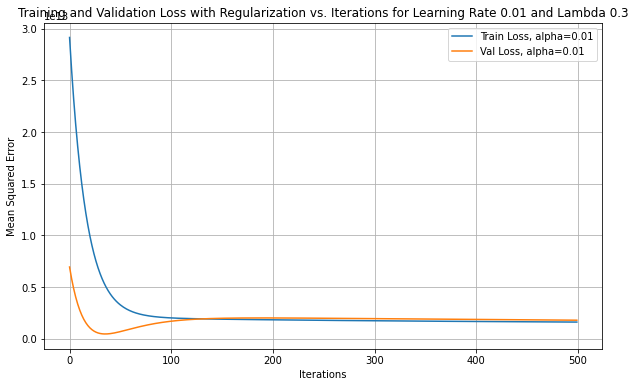

In [102]:
# Hyperparameters
learning_rate = 0.01  # Learning rate of 0.01
num_iterations = 500
initial_theta = np.zeros(X.shape[1])  
regularization_lambda = 0.3  # Regularization parameter lambda

theta_copy = initial_theta.copy()

theta_optimal, train_loss, val_loss = gradient_descent_with_regularization(X_train, y_train, theta_copy, learning_rate, num_iterations, regularization_lambda)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), train_loss, label=f'Train Loss, alpha={learning_rate}')
plt.plot(range(num_iterations), val_loss, label=f'Val Loss, alpha={learning_rate}')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title(f'Training and Validation Loss with Regularization vs. Iterations for Learning Rate {learning_rate} and Lambda {regularization_lambda}')
plt.legend()
plt.grid()
plt.show()